# Objective: Indentify which quantitative metrics are correlated (or well-predicted) with the human score in Likert scale. 

  - 1. ANOVA (variance analysis). Helps to verify whether the differences in the metric produce significant differences in the rating.
  - 2. Analysis of correlation between each metric and rating (average values) (Spearman and/or Kendall).
  - 3. Optionally, to model the relation between metric and rating, ordinal regression or linear regression if Likert is considered continuous.

**Experiments Scenarios**:
1. "Passing"
2. "Overtaking"
3. "Crossing 1"
4. "Crossing 2"
5. "Advanced 1"
6. "Advanced 2"
7. "Advanced 3"
8. "Advanced 4"

**Labels**:
1. "Good"
2. "Mid"
3. "Bad"

**QM Metrics**
- [0] Time to Goal
- [1] Path length
- [2] Cumulative heading changes
- [3] Avg robot linear speed
- [4] Social Work 
- [5] Social Work (per second)
- [6] Average minimum distance to closest person
- [7] Proxemics: intimate space occupancy
- [8] Proxemics: personal space occupancy
- [9] Proxemics: social space occupancy
- [10] Proxemics: public space occupancy

**HM Metrics**
- [0] Unobtrusiveness
- [1] Friendliness
- [2] Smoothness
- [3] Avoidance Foresight

Therefore we have 24 scenarios. 11 cuantitative metrics and 4 Likert-scale metric of 70 users. 

First, we load the data:

In [1]:
import yaml
import numpy as np
import os
from os.path import expanduser

In [78]:
home = expanduser("~")
# Load config params for experiments
config = yaml.safe_load(open('params.yaml'))['social_metrics_match']

lab_data_path = home + config['data']['repo_dir'] + config['data']['lab_data_path']
survey_data_path = home + config['data']['repo_dir'] + config['data']['survey_data_path']
results_dir = home + config['data']['results_path']
print("lab data path: ", lab_data_path)
print("survey data path: ", survey_data_path)
print("results dir path: ", results_dir)

# normalize Likert scale from 1-5 to 0-1
normalizeHM = False
# normalize quantitative metrics
normalizeQM = False
# weight the qualitative metrics according to robotics expertise
weightQual = False

lab data path:  /home/robotics/Social-Nav-Metrics-Matching/social_metrics_match/data_folder/validation_of_metrics_quantitative_and_lab_qualitative.ods
survey data path:  /home/robotics/Social-Nav-Metrics-Matching/social_metrics_match/data_folder/qualitative_metrics_survey.xlsx
results dir path:  /home/robotics/social_metrics_results


## Extract LAB data arrays

In [79]:
from utils.data_organization import organize_dict_lab_data, get_all_lab_data_arr, np_extract_exp_lab, np_single_lab_run
from utils.data_organization  import organize_dict_survey, weighted_avg_survey_data, get_robotics_knowledge, datacube_qual_survey_data

In [4]:
%pip install odfpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [80]:
dict_lab_data = organize_dict_lab_data(lab_data_path)
print(f"Lab data keys: {dict_lab_data.keys()}")
print(f"Lab data keys for passing: {dict_lab_data['Passing'].keys()}")
print(f"Lab data keys for pasing-good-qualitative: {dict_lab_data['Passing']['Good']['qualitative']['friendliness']}")

# Extract the np arrays of a specific experiments identified by its keys
passing_good_QM_array, passing_good_HM_array = np_single_lab_run(lab_dict=dict_lab_data, experiment='Passing', label='Good', normalizeHM=normalizeHM)
print(f"Passing single run QM shape:{passing_good_QM_array.shape}, passing single run HM shape: {passing_good_HM_array.shape}")
print(f"Passing good QM: {passing_good_QM_array},\nPassing good HM: {passing_good_HM_array}") 

# Extract the np arrays of a lab scenario (all the 3 runs with different labels), dividing QM and HM #'Advanced 4'
passing_QM_array, passing_HM_array = np_extract_exp_lab(dict_lab_data, experiment='Passing', order=False, normalizeQM=normalizeQM, normalizeHM=normalizeHM, normalization="rescale")
print(f"passing QM shape:{passing_QM_array.shape}, passing HM shape: {passing_HM_array.shape}")
print(f"passing QM: {passing_QM_array},\npassing HM: {passing_HM_array}")

# Starting from the complete dataframe with lab data, Extract the np arrays of all lab scenarios dividing QM and HM
all_lab_QM_array, all_lab_HM_array = get_all_lab_data_arr(dict_lab_data, normalizeQM=normalizeQM, normalizeHM=normalizeHM, normalization="rescale")
all_lab_QM_nonorm_array, all_lab_HM_nonorm_array = get_all_lab_data_arr(dict_lab_data, normalizeQM=normalizeQM, normalizeHM=normalizeHM, normalization="rescale")
print(f"All lab QM array: {all_lab_QM_array.shape}, All lab HM array: {all_lab_HM_array.shape}")
print(f"All lab QM nonorm array: {all_lab_QM_nonorm_array}, All lab HM nonorm array: {all_lab_HM_nonorm_array}")

Lab data keys: dict_keys(['Passing', 'Overtaking', 'Crossing 1', 'Crossing 2', 'Advanced 1', 'Advanced 2', 'Advanced 3', 'Advanced 4'])
Lab data keys for passing: dict_keys(['Good', 'Mid', 'Bad'])
Lab data keys for pasing-good-qualitative: 4
Passing single run QM shape:(11,), passing single run HM shape: (4,)
Passing good QM: [1.02326076e+01 4.55598068e+00 4.04913597e+00 1.99936767e-01
 1.99432749e+03 1.81716719e+02 2.37741413e+00 9.28961749e+00
 1.23341140e+01 7.28337237e+01 5.54254489e+00],
Passing good HM: [4 4 4 5]
passing QM shape:(11, 3), passing HM shape: (4, 3)
passing QM: [[1.02326076e+01 1.13191001e+01 1.63071399e+01]
 [4.55598068e+00 4.39150601e+00 4.11596254e+00]
 [4.04913597e+00 5.53722229e+00 1.25834523e+00]
 [1.99936767e-01 1.99147126e-01 1.27926288e-01]
 [1.99432749e+03 2.32556286e+03 2.40475048e+03]
 [1.81716719e+02 2.02428515e+02 1.42381909e+02]
 [2.37741413e+00 1.83902313e+00 1.47213598e+00]
 [9.28961749e+00 2.34612600e+01 4.01761145e+01]
 [1.23341140e+01 1.62201303e

**SURVEY DATA**

In [81]:
%pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [82]:
dict_survey_data = organize_dict_survey(survey_data_path)
robot_knowledge_array = get_robotics_knowledge(survey_data_path)

# To extract np arrays of all the survey data
survey_datacube = datacube_qual_survey_data(dict_survey_data, normalize=normalizeHM)

# To directly extract the average and std: If Weighted average set w_avg=True (use robotics background knowledge as weights)
survey_array_avg, survey_array_std = weighted_avg_survey_data(dict_survey_data, robot_knowledge_array, w_avg=weightQual, normalize=normalizeHM)
print(f"survey avg shape: {survey_array_avg.shape},\nsurvey weighted std shape:  {survey_array_std.shape}") 
print(f"survey avg[0]: {survey_array_avg[0]},\nsurvey weighted std[0]:  {survey_array_std[0]}")

survey avg shape: (24, 4),
survey weighted std shape:  (24, 4)
survey avg[0]: [1.8115942  2.24637681 2.52173913 2.36231884],
survey weighted std[0]:  [0.99673906 1.10867197 1.05787174 1.27371435]


# Step 1: ANOVA (variance analysis)

# Step 2: Non-parametric correlations (Spearman and Kendall)

In [ ]:
%pip install scipy

In [83]:
from scipy import stats

# All lab QM array: (24, 11), All lab HM array: (24, 4)
# Now, we compare each metric with the survey data for each of the 4 criteria
# example dict_spearman = {'social_work': {'friendliness': {'rho': 0.5, 'p': 0.6}}}
# example dict_kendall = {'social_work': {'friendliness': {'tau': 0.5, 'p': 0.6}}}
metrics = ['Time_to_Goal', 'Path_length', 'Cumulative_heading_changes', 'Avg_robot_linear_speed', 'Social_Work', 'Social_Work_per_second', 'Avg_min_distance_to_closest_person', 'Proxemics_intimate_space_occupancy', 'Proxemics_personal_space_occupancy', 'Proxemics_social_space_occupancy', 'Proxemics_public_space_occupancy']
criterias = dict_lab_data['Passing']['Good']['qualitative'].keys()
dict_spearman = {} 
dict_kendall = {}
# weighted_survey_array_avg shape: (24, 4)

for i, metric in enumerate(metrics):
    dict_spearman[metric] = {}
    dict_kendall[metric] = {}
    for j, criteria in enumerate(dict_lab_data['Passing']['Good']['qualitative'].keys()):
        # Spearman correlation
        rho, pval = stats.spearmanr(all_lab_QM_array[:, i], survey_array_avg[:,j])
        dict_spearman[metric][criteria] = {}
        dict_spearman[metric][criteria]['rho'] = rho
        dict_spearman[metric][criteria]['p'] = pval
        # Kendall correlation
        tau, pval = stats.kendalltau(all_lab_QM_array[:, i], survey_array_avg[:,j])
        dict_kendall[metric][criteria] = {}
        dict_kendall[metric][criteria]['tau'] = tau
        dict_kendall[metric][criteria]['p'] = pval

# Print the results
print("Spearman correlation results:")
for metric, criteria_dict in dict_spearman.items():
    for criteria, result in criteria_dict.items():
        print(f"{metric} - {criteria}: rho = {result['rho']}, p-value = {result['p']}")


Spearman correlation results:
Time_to_Goal - unobtrusiveness: rho = -0.4628788306317543, p-value = 0.022743230119448312
Time_to_Goal - friendliness: rho = -0.35212208006418966, p-value = 0.09150937477810116
Time_to_Goal - smoothness: rho = -0.46682629040155954, p-value = 0.021463148067509766
Time_to_Goal - avoidance foresight: rho = -0.451500695169649, p-value = 0.02678110538810674
Path_length - unobtrusiveness: rho = -0.33137421459150046, p-value = 0.11369468923636045
Path_length - friendliness: rho = -0.13667037470971022, p-value = 0.5242540627514527
Path_length - smoothness: rho = -0.20839682488569153, p-value = 0.3284622881019089
Path_length - avoidance foresight: rho = 0.03175293906299073, p-value = 0.8829035326134038
Cumulative_heading_changes - unobtrusiveness: rho = -0.25517120860790965, p-value = 0.22882483020715536
Cumulative_heading_changes - friendliness: rho = -0.12187167171566515, p-value = 0.5705131926471092
Cumulative_heading_changes - smoothness: rho = -0.3911247297959

### Now we check for possible candidates!

Spearman:
- rho [-1,1]: 
    * |rho| > 0.7           -- strong correlation
    * 0.4 < |rho| <= 0.7    -- moderate
    * 0.2 < |rho| <= 0.4    -- light
    * <= 0.2                -- none
- p: if p < 0.05            -- correlation is statistically significant

Kendall:
- tau:
    * |tau| > 0.6           -- strong
    * 0.3 < |tau| <= 0.6    -- moderate
    * 0.1 < |tau| <= 0.3    -- light
    * <= 0.1                -- none
- p: if p < 0.05            -- correlation is statitically significant

In [84]:
# Umbrales para considerar correlación significativa y fuerte
SPEARMAN_THRESH = 0.4  # fuerza
KENDALL_THRESH = 0.3   # fuerza
PVAL_THRESH = 0.05     # significancia

# Resultados filtrados
good_spearman = {}
good_kendall = {}

print("\n📊 Métricas candidatas según Spearman:")
for metric, criteria_dict in dict_spearman.items():
    for criteria, result in criteria_dict.items():
        rho, p = result['rho'], result['p']
        if abs(rho) >= SPEARMAN_THRESH and p < PVAL_THRESH:
            print(f"✅ {metric} - {criteria}: rho = {rho:.3f}, p = {p:.3f}")
            good_spearman.setdefault(metric, {})[criteria] = {'rho': rho, 'p': p}

print("\n📊 Métricas candidatas según Kendall:")
for metric, criteria_dict in dict_kendall.items():
    for criteria, result in criteria_dict.items():
        tau, p = result['tau'], result['p']
        if abs(tau) >= KENDALL_THRESH and p < PVAL_THRESH:
            print(f"✅ {metric} - {criteria}: tau = {tau:.3f}, p = {p:.3f}")
            good_kendall.setdefault(metric, {})[criteria] = {'tau': tau, 'p': p}



📊 Métricas candidatas según Spearman:
✅ Time_to_Goal - unobtrusiveness: rho = -0.463, p = 0.023
✅ Time_to_Goal - smoothness: rho = -0.467, p = 0.021
✅ Time_to_Goal - avoidance foresight: rho = -0.452, p = 0.027
✅ Social_Work_per_second - unobtrusiveness: rho = 0.469, p = 0.021
✅ Avg_min_distance_to_closest_person - smoothness: rho = 0.409, p = 0.047
✅ Proxemics_intimate_space_occupancy - unobtrusiveness: rho = -0.775, p = 0.000
✅ Proxemics_intimate_space_occupancy - friendliness: rho = -0.627, p = 0.001
✅ Proxemics_intimate_space_occupancy - smoothness: rho = -0.552, p = 0.005
✅ Proxemics_intimate_space_occupancy - avoidance foresight: rho = -0.626, p = 0.001
✅ Proxemics_personal_space_occupancy - unobtrusiveness: rho = 0.509, p = 0.011
✅ Proxemics_social_space_occupancy - smoothness: rho = 0.453, p = 0.026

📊 Métricas candidatas según Kendall:
✅ Time_to_Goal - unobtrusiveness: tau = -0.366, p = 0.013
✅ Time_to_Goal - smoothness: tau = -0.310, p = 0.035
✅ Time_to_Goal - avoidance fore

### We cross Spearman and Kendall to find coincidences

In [85]:
# Encontrar coincidencias entre Spearman y Kendall
consistent_metrics = {}

print("\n🔁 Coincidencias entre Spearman y Kendall:")
for metric in good_spearman:
    if metric in good_kendall:
        for criteria in good_spearman[metric]:
            if criteria in good_kendall[metric]:
                # Ambas pruebas coinciden
                rho = good_spearman[metric][criteria]['rho']
                tau = good_kendall[metric][criteria]['tau']
                print(f"✅ {metric} - {criteria}: rho = {rho:.3f}, tau = {tau:.3f}")
                consistent_metrics.setdefault(metric, {})[criteria] = {
                    'rho': rho,
                    'tau': tau,
                    'spearman_p': good_spearman[metric][criteria]['p'],
                    'kendall_p': good_kendall[metric][criteria]['p']
                }

# Si quieres ver todas las coincidencias juntas como diccionario:
# import pprint; pprint.pprint(consistent_metrics)



🔁 Coincidencias entre Spearman y Kendall:
✅ Time_to_Goal - unobtrusiveness: rho = -0.463, tau = -0.366
✅ Time_to_Goal - smoothness: rho = -0.467, tau = -0.310
✅ Time_to_Goal - avoidance foresight: rho = -0.452, tau = -0.320
✅ Social_Work_per_second - unobtrusiveness: rho = 0.469, tau = 0.330
✅ Proxemics_intimate_space_occupancy - unobtrusiveness: rho = -0.775, tau = -0.582
✅ Proxemics_intimate_space_occupancy - friendliness: rho = -0.627, tau = -0.451
✅ Proxemics_intimate_space_occupancy - smoothness: rho = -0.552, tau = -0.352
✅ Proxemics_intimate_space_occupancy - avoidance foresight: rho = -0.626, tau = -0.420
✅ Proxemics_personal_space_occupancy - unobtrusiveness: rho = 0.509, tau = 0.366


### Store the results in CSV

In [86]:
# We generate a CSV file with the results ordered by strength of correlation
import pandas as pd

# Paso 1: Convertir consistent_metrics en lista de filas
rows = []
for metric, crit_dict in consistent_metrics.items():
    for criteria, vals in crit_dict.items():
        strength = (abs(vals['rho']) + abs(vals['tau'])) / 2
        rows.append({
            'metric': metric,
            'criteria': criteria,
            'rho': vals['rho'],
            'tau': vals['tau'],
            'spearman_p': vals['spearman_p'],
            'kendall_p': vals['kendall_p'],
            'strength': strength
        })

# Paso 2: Crear DataFrame y ordenar por fuerza de correlación
df_corr = pd.DataFrame(rows)
df_corr_sorted = df_corr.sort_values(by='strength', ascending=False)

# Paso 3: Guardar en CSV
df_corr_sorted.to_csv("correlaciones_consistentes.csv", index=False)

print("\n✅ Correlaciones consistentes ordenadas por fuerza de correlación y guardadas en 'correlaciones_consistentes.csv'")



✅ Correlaciones consistentes ordenadas por fuerza de correlación y guardadas en 'correlaciones_consistentes.csv'


### Generate a heatmap of the correlations

/tmp/ipykernel_118556/859502384.py:17: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_118556/859502384.py:20: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from current font.
  plt.savefig("heatmap_correlaciones.png", dpi=300)
/home/robotics/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


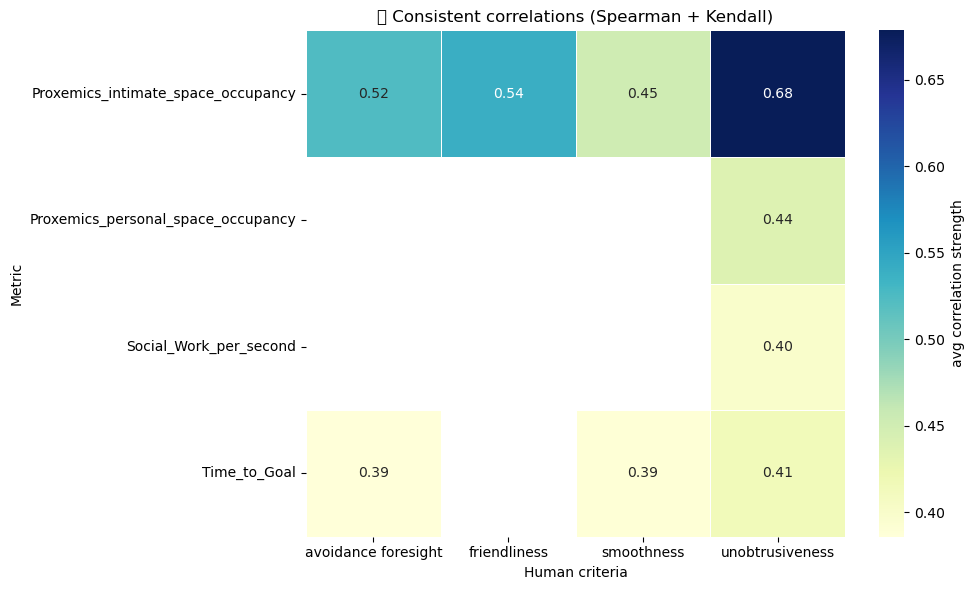

In [87]:
# Generate a heatmap of the correlations
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot para formato tipo tabla (filas: métricas, columnas: criterios)
heatmap_data = df_corr_sorted.pivot(index='metric', columns='criteria', values='strength')

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'avg correlation strength'})

plt.title("🔁 Consistent correlations (Spearman + Kendall)")
plt.ylabel("Metric")
plt.xlabel("Human criteria")
plt.tight_layout()

# Guardar el heatmap como imagen PNG (puedes cambiar el nombre o formato)
plt.savefig("heatmap_correlaciones.png", dpi=300)
# Mostrar el heatmap
plt.show()


## Step 2: ORDINAL REGRESSION (ideal for Likert)

But we should work with ordinal data (Likert 1-5).
Since we are employing the average values (and normalizing the data in some cases), we do not use the ordinal ones, and we do not apply this.

Instead--> LINEAR REGRESSION (continuous Likert) 


# Code for linear regression with statmodels

- coef → cuánto cambia la valoración por unidad de cambio en la métrica.

- P>|t| → si es < 0.05, se considera que esa métrica está estadísticamente relacionada con el criterio humano.

- R-squared → qué tanto del criterio puede explicarse con las métricas (idealmente cercano a 1).

- const → término independiente (intercepto).

### Consejito:
Si el modelo tiene R² bajo y muchos p-valores > 0.05, puede que haya mucho ruido, o que no todas las métricas sean relevantes.
Puedes seleccionar solo métricas significativas o hacer regularización (Lasso, Ridge) si hay multicolinealidad.

In [13]:
%pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [88]:
import statsmodels.api as sm
import pandas as pd

# Nombres opcionales
criteria_names = criterias
metrics_names = metrics

# Convertimos X a DataFrame para claridad en nombres de variables
X = pd.DataFrame(all_lab_QM_array, columns=metrics_names)

for i, crit in enumerate(criteria_names):
    y = survey_array_avg[:, i]

    # Añadimos intercepto manualmente
    X_with_const = sm.add_constant(X)

    model = sm.OLS(y, X_with_const)
    result = model.fit()

    print(f"\n📊 Regresión lineal para criterio: {crit}")
    print(result.summary())



📊 Regresión lineal para criterio: unobtrusiveness
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     4.559
Date:                Tue, 08 Apr 2025   Prob (F-statistic):            0.00638
Time:                        17:03:28   Log-Likelihood:                -21.928
No. Observations:                  24   AIC:                             65.86
Df Residuals:                      13   BIC:                             78.81
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

El siguiente script will do:

- Ajustará una regresión lineal con todas las métricas.

- Revisará los p-valores de cada coeficiente.

- Filtrará solo las métricas significativas (p < 0.05).

- Ajustará un nuevo modelo solo con esas métricas.

- Mostrará un resumen limpio del resultado final y lo guardará en un archivo csv.

In [89]:
import statsmodels.api as sm
import pandas as pd

# Nombres
# Nombres opcionales
criteria_names = criterias
metrics_names = metrics

results_list = []

# DataFrame con nombres
X = pd.DataFrame(all_lab_QM_array, columns=metrics_names)

for i, crit in enumerate(criteria_names):
    y = survey_array_avg[:, i]

    # Primer modelo con todas las métricas
    X_with_const = sm.add_constant(X)
    model_full = sm.OLS(y, X_with_const).fit()

    # Filtrar métricas con p < 0.05
    significant_vars = model_full.pvalues[model_full.pvalues < 0.05].index
    significant_vars = significant_vars.drop('const', errors='ignore')

    print(f"\n📊 Regresión para '{crit}' con métricas significativas:")
    if len(significant_vars) == 0:
        print("⚠️ No hay métricas significativas con p < 0.05")
    else:
        # Crear nuevo modelo con solo las variables significativas
        X_sig = sm.add_constant(X[significant_vars])
        model_sig = sm.OLS(y, X_sig).fit()
        print(model_sig.summary())

        # Guardar coeficientes y p-valores
        for var in significant_vars:
            results_list.append({
                'criterion': crit,
                'metric': var,
                'coef': model_sig.params[var],
                'p_value': model_sig.pvalues[var]
            })

if(len(results_list) > 0):
    # Convertir a DataFrame
    results_df = pd.DataFrame(results_list)
    # Guardar en CSV
    results_df.to_csv("regression_results.csv", index=False)
    print("\n✅ Resultados de regresión guardados en 'regression_results.csv'")



📊 Regresión para 'unobtrusiveness' con métricas significativas:
⚠️ No hay métricas significativas con p < 0.05

📊 Regresión para 'friendliness' con métricas significativas:
⚠️ No hay métricas significativas con p < 0.05

📊 Regresión para 'smoothness' con métricas significativas:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.1329
Date:                Tue, 08 Apr 2025   Prob (F-statistic):              0.719
Time:                        17:03:32   Log-Likelihood:                -20.054
No. Observations:                  24   AIC:                             44.11
Df Residuals:                      22   BIC:                             46.47
Df Model:                           1                                         
Covarian

Plot the importance of the metrics (absolute coefficient)

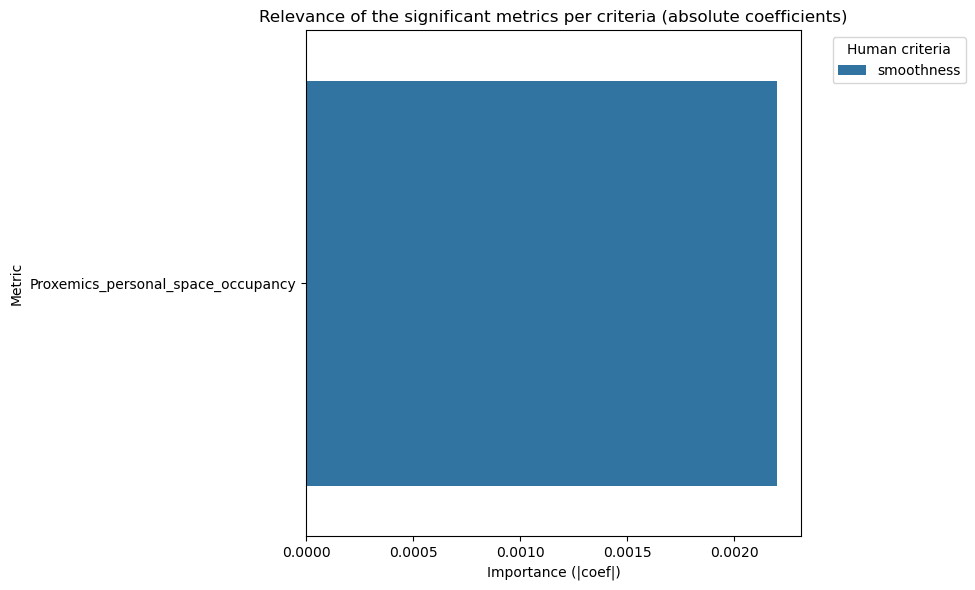

📷 Gráfico guardado como 'importancia_metricas.png'


In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de tener df_results del bloque anterior
if(len(results_list) > 0):
    # Creamos columna para importancia (valor absoluto del coeficiente)
    results_df['importance'] = results_df['coef'].abs()

    # Hacemos una gráfica por criterio
    plt.figure(figsize=(10, 6))
    sns.barplot(data=results_df, x='importance', y='metric', hue='criterion', dodge=True)

    plt.title("Relevance of the significant metrics per criteria (absolute coefficients)")
    plt.xlabel("Importance (|coef|)")
    plt.ylabel("Metric")
    plt.legend(title="Human criteria", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig("importancia_metricas.png", dpi=300)
    plt.show()

    print("📷 Gráfico guardado como 'importancia_metricas.png'")
else:
    print("⚠️ No hay métricas significativas para graficar.")
